<a href="https://colab.research.google.com/github/Khemapsorn/data_viz_2022/blob/main/SVEIQCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# เตรียมโค้ดคำนวณ

In [1]:
#import libralies
import pandas as pd # ใช้จัดการข้อมูลต่าง ๆ ที่เป็นตาราง พวกexcel ,CSV
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # พล็อตกราฟต่างๆ 

from scipy.integrate import odeint #Integrate a system of ordinary differential equations.
                                                # func(y, t0, ...) 

%config InlineBackend.figure_format = 'retina'

# SVEIQCR simulation of Monkeypox in human

## พารามิเตอร์ของตัวแบบ และสมการเชิงอนุพันธ์

In [9]:
 #SVEIQCR model ในประชากรมนุษย์
 #Differential equations
def deriv (y, t, Lambda, Phi, Mu, Lamda, Nu, theta, Beta, delta, alpha, Tau, Rho,gamma): # paramerter ในตัวแบบ โดย t คือ เวลา N จำนวนประชากรมนุษย์ทั้งหมด
    S, V, E, I, Q, C, R = y
    dSdt = Lambda+Phi*Q-Mu*S-Lamda*S-Nu*S
    dVdt = Nu*S+Mu*V
    dEdt = Lamda*S-Mu*E-theta*E-Beta*E
    dIdt = theta*E-delta*I-Mu*I-Rho*I-gamma*I
    dQdt = Beta*E-delta*Q-Mu*Q-Phi*Q-Tau*Q
    dCdt = gamma*I-delta*C-Mu*C-alpha*C
    dRdt =Rho*I+Tau*Q+alpha*C-Mu*R
    return dSdt, dVdt, dEdt, dIdt, dQdt, dCdt, dRdt

In [14]:
# parameter value
Lambda =0.029
Phi = 0.5
Mu = 0.0003
Lamda = 0.00000189
Nu =0.01 #1%
theta = 0.032
Beta = 0.333 # กักตัว 3 วัน
delta = 0.2
alpha = 0.036
Tau = 0.52
Rho = 0.088
gamma = 0.5

# Time period (100 days)
t = np.arange(0,100,1)

#Initial number 
S0 = 332900000
V0 = 717362
E0 =0
I0 = 28615
Q0 = 0
C0 = 0
R0 = 0
N = 332,928,615

# Constant rate 
L = 0.029
P = 0.5
M= 0.0003
l = 0.00000189
N = 0.01
T =0.032
B =0.333
D =0.2
A =0.036
TT = 0.52
R = 0.088
G = 0.5
#Integration SVEIQCR model
simulationresult = odeint(deriv, (S0, V0, E0, I0, Q0, C0,R0), t, args = (N,L,P, M,l,N,T,B,D,A,TT,R,G))

#Summary
simulationResult = pd.DataFrame(simulationresult, columns = ['Susceptible','Vaccine','Exposed', 'Infectious','Quarantine','Clinically','Recovered' ])
simulationResult = simulationResult.astype(np.int32)

TypeError: ignored

# SEI simulation of Monkeypox in rodent

## พารามิเตอร์ของตัวแบบ และสมการเชิงอนุพันธ์

In [2]:
# SEI model ในประชากรสัตว์ฟันแทะ
# Differential equations
def deriv(y, t,N, Lambda, Mu, Lamda, theta, delta): # 
    S, E, I = y
    dSdt = Lambda-Mu*S-Lamda*S
    dEdt = Lamda*S-Mu*E-theta*E
    dIdt = theta*E -delta*I-Mu*I
    return dSdt, dEdt, dIdt

In [3]:
# parameter value
Lambda = 0.2
Mu = 0.1
Lamda = 0
theta = 0.032
delta = 0.5

# Time period (100 days)
t = np.arange(0,100,1)

#Initial number of exposed, infected and recovered
S0 = 100
E0 = 0
I0 = 0
N=100

# Constant rate 
L = 0.2  
M = 0.1 
l= 0
T = 0.032  
d = 0.5

#Integration SEI model
simulationresult = odeint(deriv, (S0, E0, I0), t, args = (N,L, M, l, T, d))

#Summary
simulationResult = pd.DataFrame(simulationresult, columns = ['Susceptible', 'Exposed', 'Infectious', ])
simulationResult = simulationResult.astype(np.int32)

In [4]:
t = np.arange(0,100,1)
t

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [5]:
simulationResult

,Susceptible,Exposed,Infectious
0,100,0,0
1,90,0,0
2,82,0,0
3,74,0,0
4,67,0,0
...,...,...,...
95,2,0,0
96,2,0,0
97,2,0,0
98,2,0,0


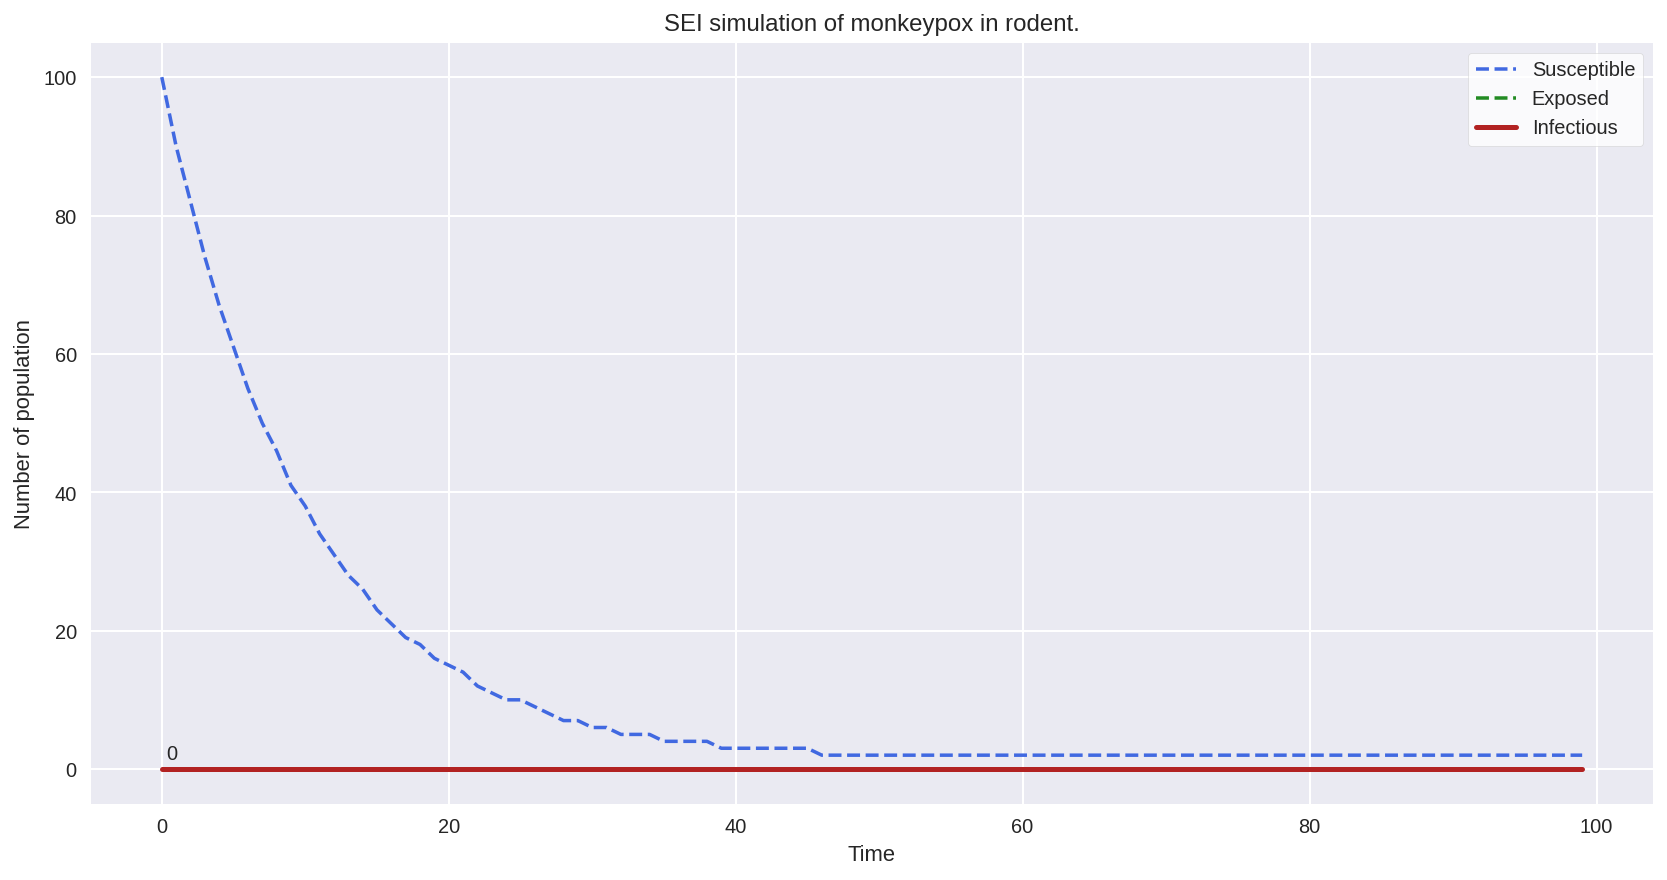

In [8]:
# plot the simulation
plt.figure (figsize = (14, 7)) #กำหนดขนาด
with plt.style.context('seaborn'): # พล็อตเนื้อหา สไตล์ต่าง ๆ
    plt.title('SEI simulation of monkeypox in rodent.') # ชื่อกราฟ
    plt.xlabel('Time') # แกน X
    plt.ylabel('Number of population') # แกน Y
    plt.plot(simulationResult['Susceptible'], c = 'royalblue', linestyle = '--',label = 'Susceptible') # S
    plt.plot(simulationResult['Exposed'], c = 'forestgreen', linestyle = '--' ,label = 'Exposed') # E
    plt.plot(simulationResult['Infectious'], c = 'firebrick', linewidth = 2.5,label = 'Infectious') #I
    plt.annotate(simulationResult['Infectious'].max(),
                    (simulationResult['Infectious'].idxmax(), simulationResult['Infectious'].max()),
                    textcoords = 'offset points', xytext = (5,5),ha = 'center')
    plt.legend(frameon = True, facecolor = 'white') # โชว์เส้นกริด ทำเป็นสีขาว
    plt.show()